**Title** : Build the Image Classification model using CNN Deep Learning Architecture.

**Name** : Sumit Ishwar Sonawane

**Roll No.**: 59          **Batch**: IT-3

**Department** : BE-IT


In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.datasets import mnist

In [3]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Load dataset manually from local file
data = np.load('mnist_dataset.npz')

# Extract train and test data
X_train, y_train = data['X_train'], data['y_train']
X_test, y_test = data['X_test'], data['y_test']

print(data.files)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

['X_train', 'y_train', 'X_test', 'y_test']
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [6]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

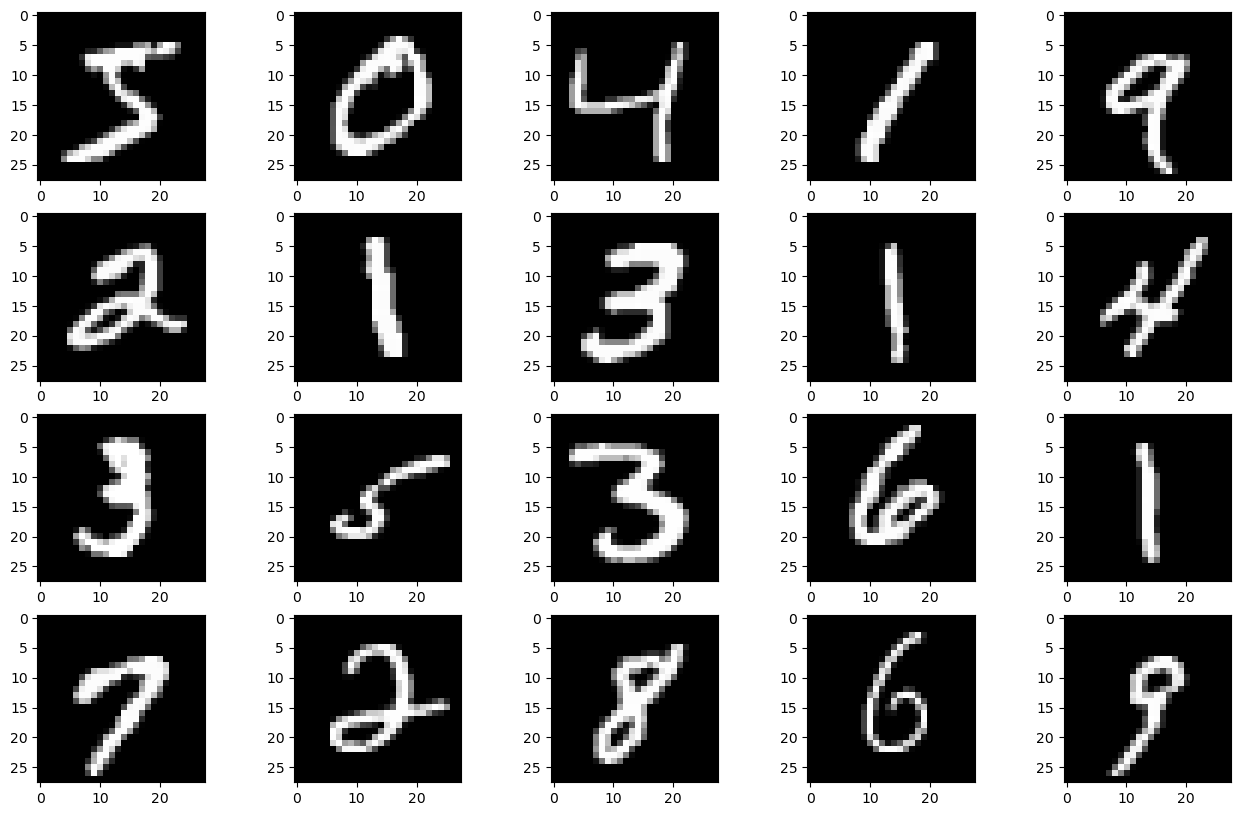

In [7]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    # plt.title(f"Digit: {digit}")
    # plt.xticks([])
    # plt.yticks([])

plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()


In [8]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [9]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])



C:\Users\Slazer Electronics\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9297 - loss: 0.2326
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9772 - loss: 0.0755
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9848 - loss: 0.0496


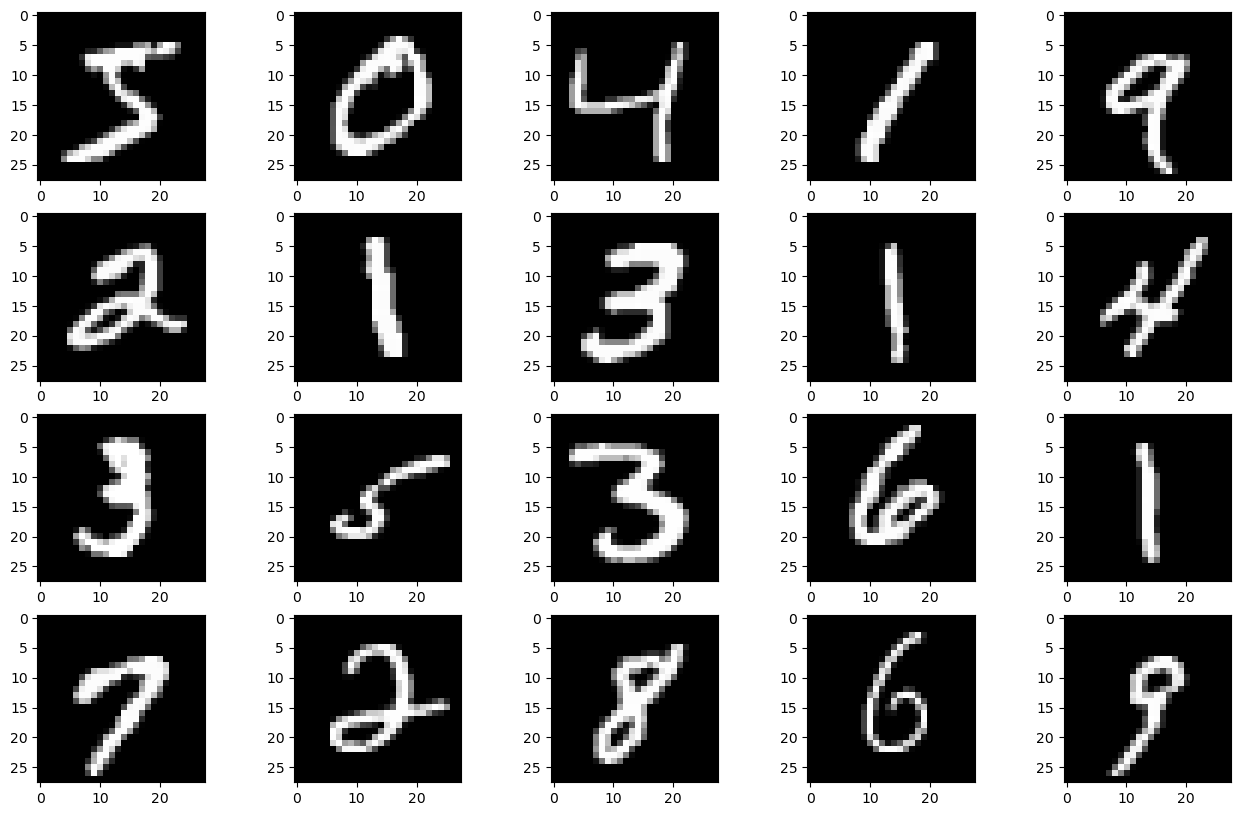

In [14]:
plt.figure(figsize=(16, 10))
for i in range(20):
    # image = random.choice(X_test).squeeze()
    # digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    # plot_digit(image, digit, plt, i)
    plot_digit(X_train[i],y_train[i],plt,i )
plt.show()

In [87]:
# predictions = np.argmax(model.predict(X_test), axis=-1)
# accuracy_score(y_test, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


0.9837

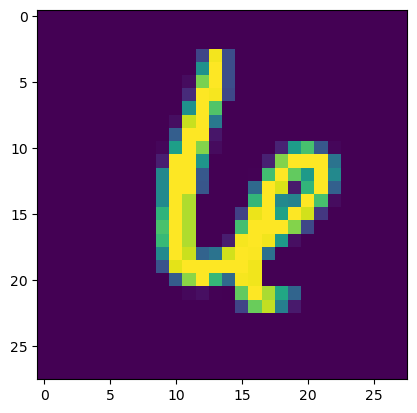

In [15]:
n=random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [16]:
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Handwritten number in the image is= 6


In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1])

Test loss: 0.05997334420681
Test accuracy: 0.9807999730110168


In [69]:
#The implemented CNN model is giving Loss=0.04624301567673683  and
#accuracy: 0.9872000217437744 for test mnist dataset